<a href="https://colab.research.google.com/github/shintafiaa/Kampus-Merdeka-ML-Terapan/blob/main/4_Predictive_Analytics_of_House_Price(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediksi Analitik Penjualan Rumah di King County, Washington State, USA
Dataset ini berisi data riwayat penjualan rumah di King Country, Washington State, USA, pada bulan Mei 2014 hingga Mei 2015.

**Impor *Library***

*Libray* numpy digunakan untuk memproses larik atau array.

*Libray* matplotlib digunakan membuat visualisasi data dalam dua dimensi.

*Libray* seaborn dibangun di atas *library* matplotlib, digunakan untuk membuat visualisasi data.

*Libray* pandas digunakan untuk menganalisis dan memanipulasi data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

**Muat Dataset**

Memuat dataset dengan nama file 'kc_house_data.csv' dengan format file csv (comma separated value)

In [ ]:
house = pd.read_csv('kc_house_data.csv')

**Menampilkan Dataframe**

In [ ]:
house

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

Terdapat 21613 data yang terdiri dari 21 atribut.

id: notasi  rumah

date: tanggal rumah terjual

price: harga penjualan rumah, fitur target

bedrooms: jumlah kamar tidur pada rumah

bathrooms: jumlah kamar mandi pada rumah

sqft_living: luas rumah dalam satuan s*quare feet*

sqft_lot: luas tanah dalam satuan *square feet*

floors: jumlah tingkat/lantai rumah

waterfront: rumah dengan view menghadap pantai

view: telah dilihat

condition: kondisinya secara keseluruhan

grade: nilai keseluruhan yang diberikan kepada *housing-unit,* berdasarkan sistem penilaian King County

sqft_above: luas rumah terpisah dari ruang-bawah-tanah dalam satuan *square feet*

sqft_basement: luas ruang-bawah-tanah dalam satuan *square feet*

yr_built: tahun dibangun

yr_renovated: tahun rumah direnovasi

zipcode: kode pos

lat: koordinat garis lintang

long: koordinat garis bujur

sqft_living15: luas rumah pada tahun 2015 (menunjukkan renovasi), bisa mempengaruhi/tidak mempengaruhi luas kavling

sqft_lot15: luas tanah pada tahun 2015 (menunjukkan renovasi)

**Mengubah Atribut 'date' Menjadi 'month' dan 'year'**

In [ ]:
house['date'] = pd.to_datetime(house['date'])

In [ ]:
house['month'] = house['date'].apply(lambda date: date.month)
house['year'] = house['date'].apply(lambda date: date.year)

**Mengecek Informasi pada Dataset**

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Terdapat enam atribut bertipe data float, empat belas atribut bertipe data integer, satu atribut bertipe data objetct.

Terdapat suatu kesalahan pada tipe data atribut bathrooms dan floors. Kedua atribut tersebut seharusnya memiliki nilai berupa bilangan bulat atau bertipe data integer.

**Mentransformasi Atribut 'bathrooms' dan 'floors'**

Membulatkan nilai atribut bathrooms dan floor dengan pembulatan ke bawah.

In [ ]:
house['bathrooms'] = np.round(house['bathrooms'])
house['floors'] = np.round(house['floors'])

Mengubah tipe data atribut bathrooms dari float menjadi integer

In [ ]:
house = house.astype({'bathrooms': 'int64', 'floors':'int64'})

**Melihat Deskripsi Statistika Dataset**

In [ ]:
house.describe()

id         price  ...         month          year
count  2.161300e+04  2.161300e+04  ...  21613.000000  21613.000000
mean   4.580302e+09  5.400881e+05  ...      6.574423   2014.322954
std    2.876566e+09  3.671272e+05  ...      3.115308      0.467616
min    1.000102e+06  7.500000e+04  ...      1.000000   2014.000000
25%    2.123049e+09  3.219500e+05  ...      4.000000   2014.000000
50%    3.904930e+09  4.500000e+05  ...      6.000000   2014.000000
75%    7.308900e+09  6.450000e+05  ...      9.000000   2015.000000
max    9.900000e+09  7.700000e+06  ...     12.000000   2015.000000

[8 rows x 22 columns]

Nilai minimal 0 ditunjukkan pada atribut-atribut seperti, bedrooms, bathrooms, waterfront, view, sqft_basement, yr_renovated.

Terdapat kesalahan pada nilai minimal atribut bedrooms dan bathrooms. Di era moderen, tahun 2014-2015, di daerah Washington, USA, bangunan rumah setidaknya memiliki satu kamar tidur, dan satu kamar mandi.

**Cek Nilai 0 pada Atribut 'bedrooms' dan 'bathrooms'**

In [ ]:
bedrooms = (house.bedrooms == 0).sum()
bathrooms = (house.bathrooms == 0).sum()

print("Nilai 0 di kolom bedrooms ada: ", bedrooms)
print("Nilai 0 di kolom y bathrooms: ", bathrooms)

Nilai 0 di kolom bedrooms ada:  13
Nilai 0 di kolom y bathrooms:  14


**Cek apakah tiga belas nilai 0 pada atribut bedrooms terdapat pada baris yang sama pada empat belas nilai 0 milik atribut bathrooms?**

Pengecekkan menggunakan atribut bathrooms dengan nilai 0 lebih banyak dari nilai bedrooms.

In [ ]:
house.loc[(house['bathrooms']==0)]

id       date      price  ...  sqft_lot15  month  year
875    6306400140 2014-06-12  1095000.0  ...        4000      6  2014
1149   3421079032 2015-02-17    75000.0  ...       42882      2  2015
2261   3971701455 2014-10-03   273000.0  ...        8976     10  2014
3119   3918400017 2015-02-05   380000.0  ...        1399      2  2015
5832   5702500050 2014-11-04   280000.0  ...       22549     11  2014
6994   2954400190 2014-06-24  1295650.0  ...       35061      6  2014
9773   3374500520 2015-04-29   355000.0  ...        8050      4  2015
9854   7849202190 2014-12-23   235000.0  ...        7200     12  2014
10424  7129800036 2015-01-14   109000.0  ...        5040      1  2015
10481   203100435 2014-09-18   484000.0  ...       19290      9  2014
11674  7987400316 2014-08-14   255000.0  ...        2992      8  2014
12041  2991000160 2014-12-12   312500.0  ...        6371     12  2014
14423  9543000205 2015-04-13   139950.0  ...        9600      4  2015
19452  3980300371 2014-09-26   142000.0  ...       22850      9  2014

[14 rows x 23 columns]

Nilai 0 pada baris data atribut bedrooms berbeda dengan baris data nilai 0 milik atribut bathrooms.

Sehingga, kita perlu hapus baris yang memiliki nilai 0 untuk masing-masing variabel bedrooms dan bathrooms. 

**Menghapus Nilai 0 pada Variabel 'bedrooms' dan 'bathrooms'**

In [ ]:
house = house.loc[(house[['bedrooms','bathrooms']]!=0).all(axis=1)]

**Cek Ukuran Data**

In [ ]:
house.shape

(21593, 23)

Pada sel deskripsi statistik terakhir menunjukkan data berjumlah 21613 buah. Dengan dihapusnya data yang bernilai 0 yang berjumlah 20 baris data, maka, jumlah baris data yang utuh saat ini berjumlah 21593 buah.

**Melihat Keberadaan Data 'null' pada Dataset**

In [ ]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

Terdapat dua data yang bernilai null pada atribut sqft_above.

**Hapus Data yang Bernilai 'null'**

In [ ]:
house.dropna(inplace=True)

In [ ]:
#Cek kembali data null pada dataset
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [ ]:
#Cek kembali deskripsi statistika
house.describe()

id         price  ...         month          year
count  2.159100e+04  2.159100e+04  ...  21591.000000  21591.000000
mean   4.580326e+09  5.402559e+05  ...      6.573943   2014.322959
std    2.876859e+09  3.671590e+05  ...      3.114874      0.467618
min    1.000102e+06  7.800000e+04  ...      1.000000   2014.000000
25%    2.123049e+09  3.220000e+05  ...      4.000000   2014.000000
50%    3.904930e+09  4.500000e+05  ...      6.000000   2014.000000
75%    7.309000e+09  6.450000e+05  ...      9.000000   2015.000000
max    9.900000e+09  7.700000e+06  ...     12.000000   2015.000000

[8 rows x 22 columns]

**Menghapus Atribut 'id' dan 'date'**

Atribut 'id' tidak digunakan dalam prediksi. Atribut 'date' sudah digantikan dengan atribut 'month' dan 'year'.

In [ ]:
house.drop('id',inplace=True,axis=1)
house.drop('date',inplace=True,axis=1)

In [ ]:
#Cek kembali informasi dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21591 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21591 non-null  float64
 1   bedrooms       21591 non-null  int64  
 2   bathrooms      21591 non-null  int64  
 3   sqft_living    21591 non-null  int64  
 4   sqft_lot       21591 non-null  int64  
 5   floors         21591 non-null  int64  
 6   waterfront     21591 non-null  int64  
 7   view           21591 non-null  int64  
 8   condition      21591 non-null  int64  
 9   grade          21591 non-null  int64  
 10  sqft_above     21591 non-null  float64
 11  sqft_basement  21591 non-null  int64  
 12  yr_built       21591 non-null  int64  
 13  yr_renovated   21591 non-null  int64  
 14  zipcode        21591 non-null  int64  
 15  lat            21591 non-null  float64
 16  long           21591 non-null  float64
 17  sqft_living15  21591 non-null  int64  
 18  sqft_l

Sudah tidak ada atribut id, dan atribut object. Selain itu, atribut bathrooms dan floors sekarang bertipe data int64.

**Univariate EDA**

**Analisis Fitur Numerik dengan Memvisualisasikan data**

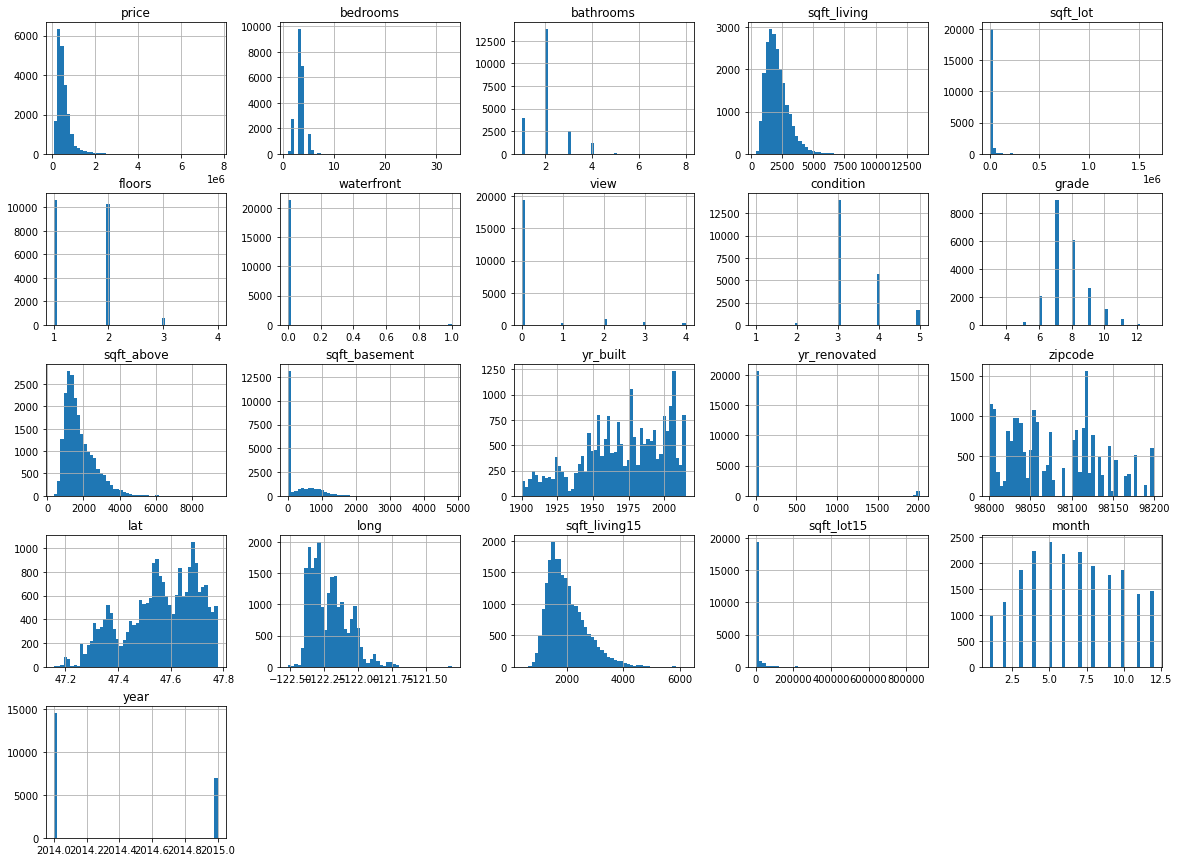

In [ ]:
house.hist(bins=50, figsize=(20,15))
plt.show()

Informasi dari histogram di atas:

1. Peningkatan harga rumah sebanding dengan penurunan jumlah sampel. Distribusi harga rumah miring ke kanan (right-skewed).
2. Lebih dari 50% rumah memiliki satu hingga lima kamar tidur.
3. Sebagian besar rumah memiliki dua kamar mandi.
4. Sebagian besar rumah memiliki luas rumah 2000 *square feet.*
5. Sebagian besar rumah memiliki luas tanah atau *lot* sekitar satu *square feet.*
6. Sebagian besar rumah memiliki satu atau dua tingkat/lantai.
7. Sebagian besar rumah tidak memiliki *waterfront*.
8.  Sebagian besar rumah tidak memiliki *view*.
9. Sebagian besar rumah memiliki nilai *condition* sebesar tiga poin.
10. Sebagian besar rumah meiliki nilai *grade* sebesar tujuh hingga delapan poin.
11. Sebagian besar rumah memiliki luas *above* atau *footage of house apart from basement* sebesar ratusan hingga 6100 *square feet.*
12. Sebagian besar rumah tidak memiliki *basement*.
13. Rumah dibangun di antara rentang tahun 1900 hingga 2015.
14. Sebagian besar rumah tidak mengalami renovasi.
15. Data *zipcode* rumah berada pada rentang nilai 98000 hingga 98200.
16. Data *latitude* menggambarkan *left-skewed*.
17. Data *longitude* menggambarkan *right-skewed*.
18. Data variabel sqft_living15 menggambarkan *right-skewed*.
19. Sebagian besar rumah tidak merenovasi luas *lot* atau tanah, sehingga data sqft_lot15 terbanyak berada pada nilai 0.
20. Penjualan terbanyak berada pada bulan Mei.
21. Penjualan pada tahun 2014 lebih banyak daripada penjualan di tahun 2015.


**Multivariate EDA**

**Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'**

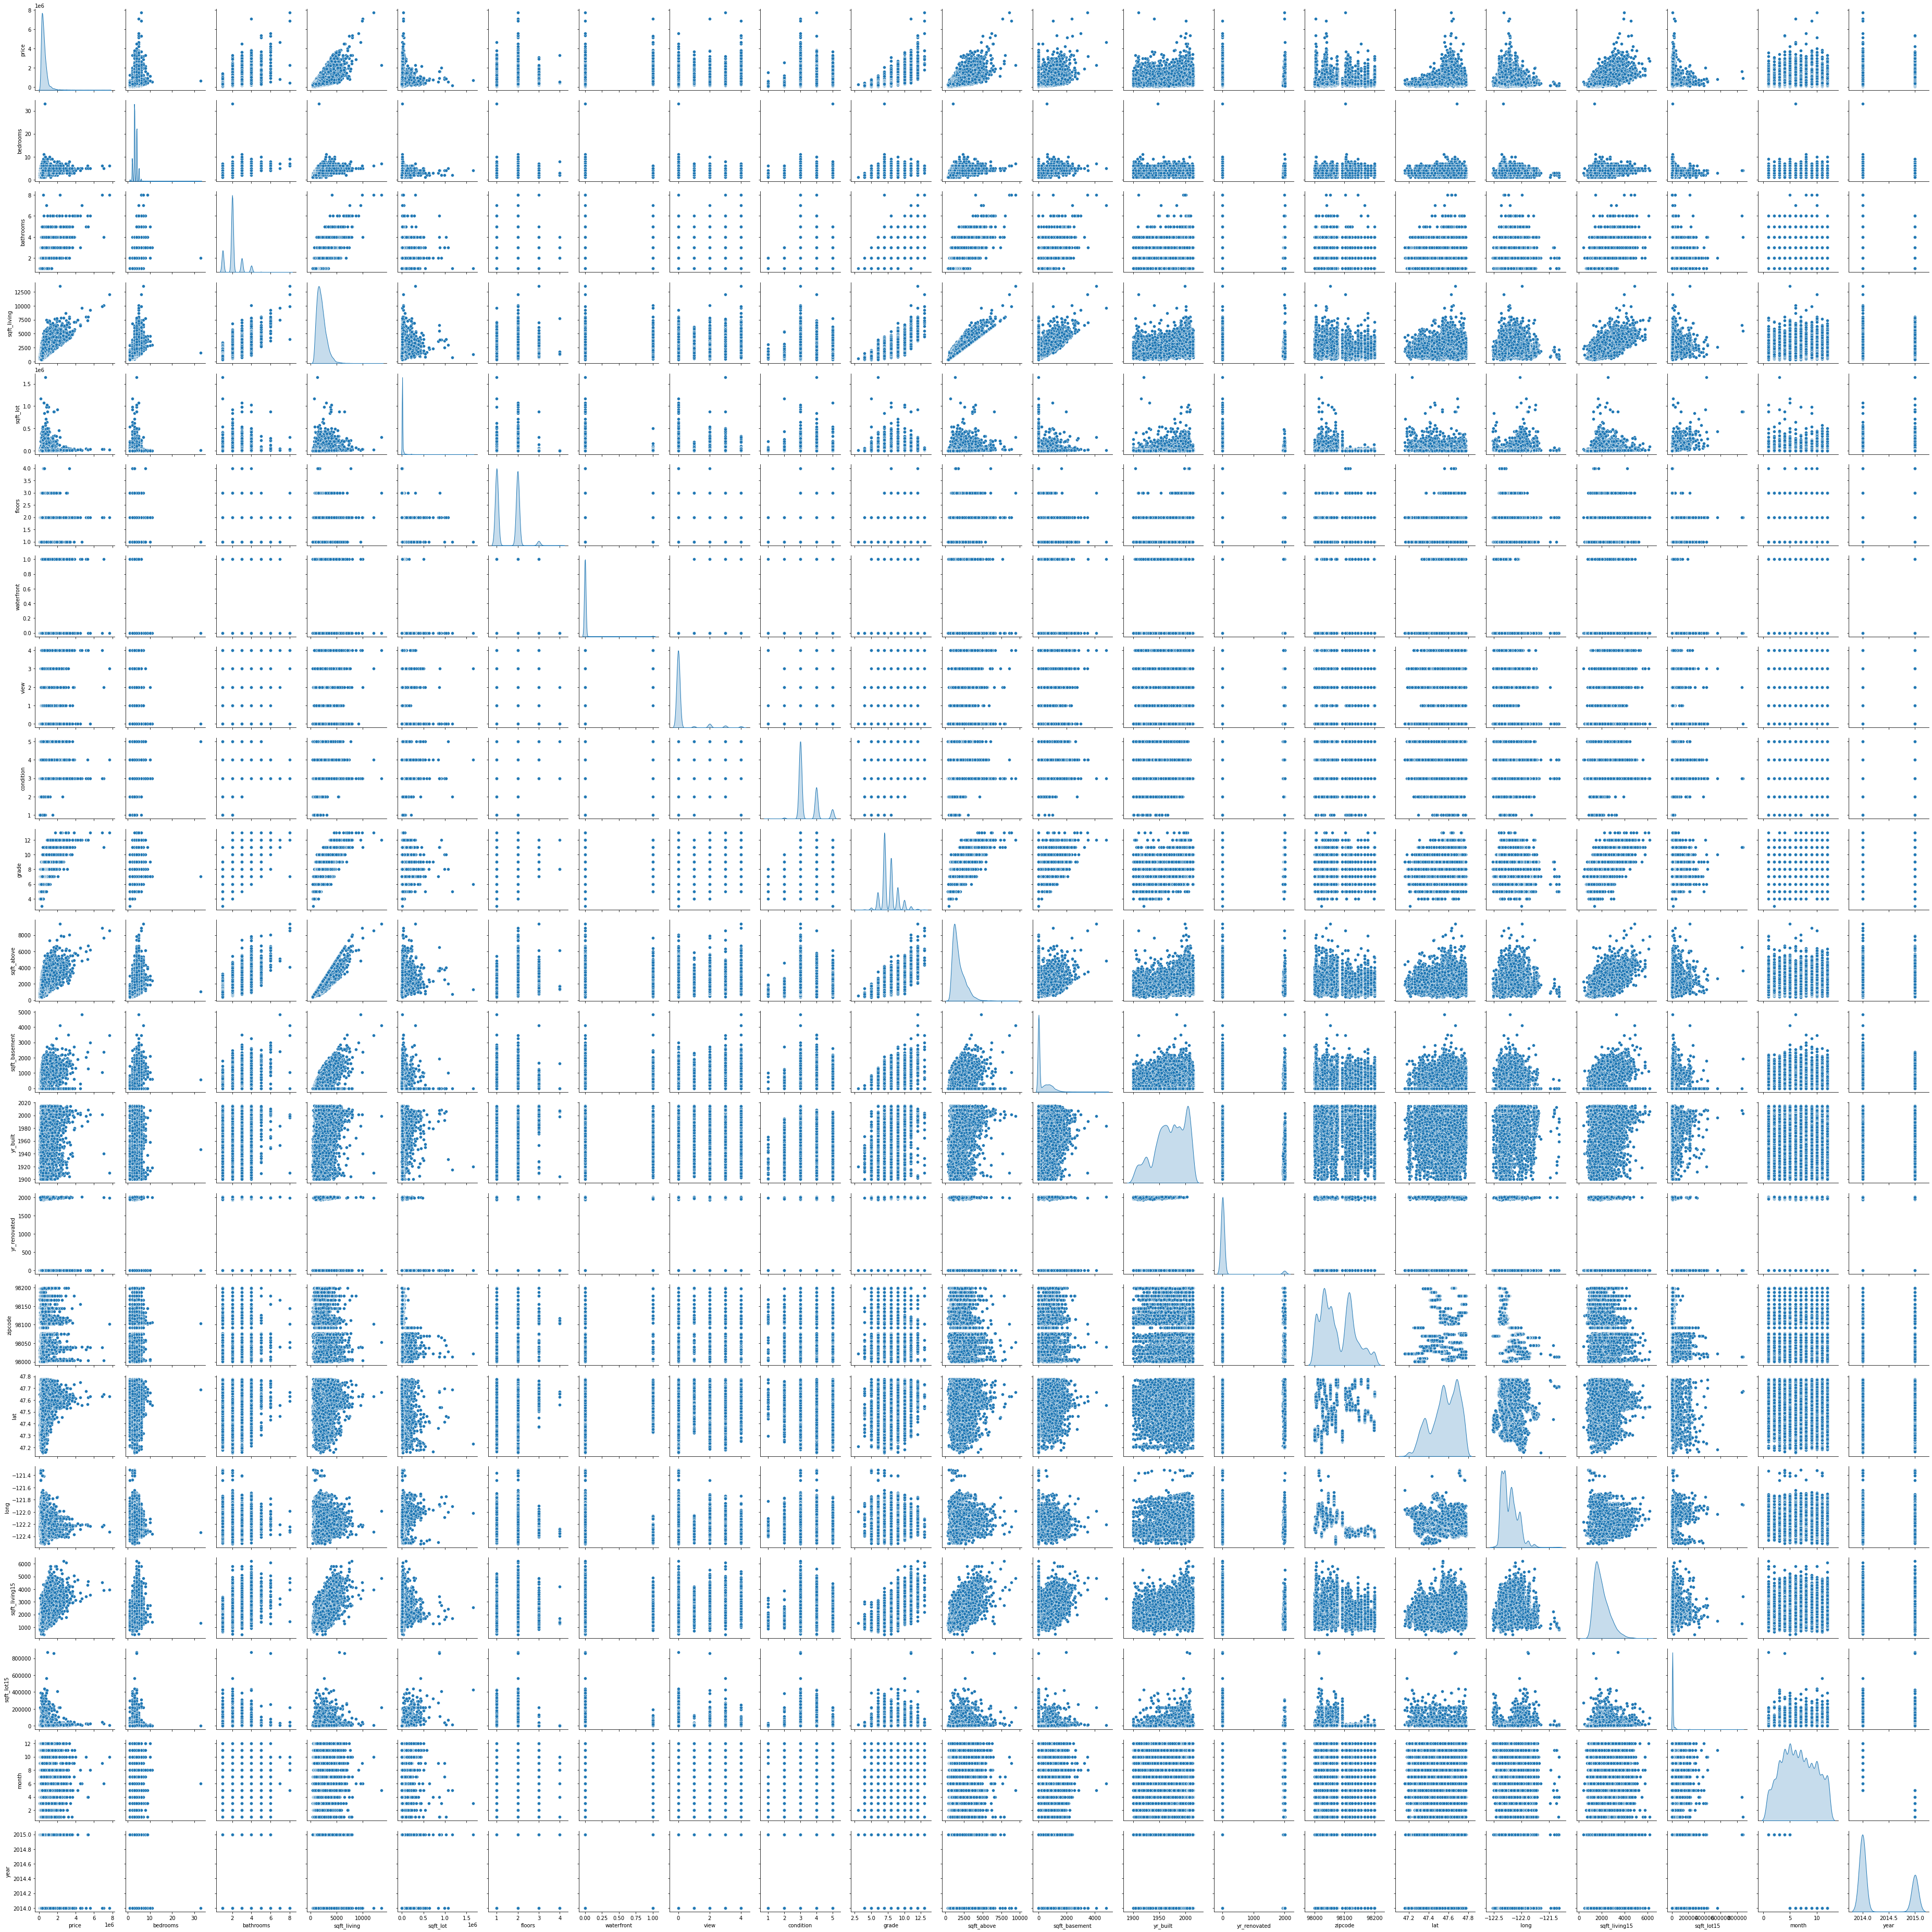

In [ ]:
sns.pairplot(house, diag_kind = 'kde')

Keterkaitan antara tiap atribut dengan atribut *price* terlihat pada baris pertama visualisasi data. 

**Evaluasai Skor Korelasi dengan Fungsi 'corr()'**

Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

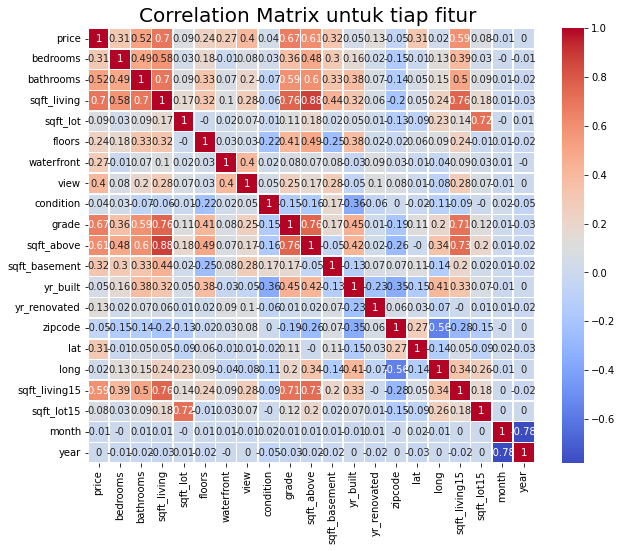

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

Keterangan matriks:

1. Korelasi tiap fitur terhadap fitur 'price' tertera pada baris pertama.

2. Koefisien korelasi mendekati 1 atau -1, menunjukkan kuatnya hubungan antara dua variabel (menggambarkan korelasi positif atau negatif).

3. Semakin mendekati 0 nilai koefisien korelasi, maka semakin kecil hubungan antara dua variabel tersebut. 

4. Semakin pekat warna merah pada persegi menunjukkan semakin kuat korelasi positif antara dua fitur.

5. Semakin pekat warna biru pada persegi menunjukkan semakin kuat korelasi negatif antara dua fitur.

6. Semakin terang warna biru, semakin menunjukkan korelasi yang lemah antara dua fitur.

7. Berikut adalah daftar fitur yang memiliki hubungan lemah dengan fitur 'price' atau memiliki warna berupa biru muda atau mendekati warna biru muda: sqft_lot, condition, yr_built, yr_renovated, zipcode, long, sqft_lot15, month, year.

**Data Preparation**

Menginisialisasikan variabel X yang merupakan fitur-fitur untuk memprediksi harga suatu rumah, dan variabel y yang merupakan fitur target atau nilai yang akan diprediksi. Tidak mengikutsertakan fitur-fitur yang memiliki pengaruh/korelasi lemah dengan fitur 'price'.

In [23]:
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]
y = house['price']

**Split Dataset**

Split dataset menjadi data latih dan data uji sebelum transformasi. Hal ini ditujukan supaya transformasi diterapkan hanya pada data latih.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

**Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji.**

In [25]:
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 21591
Total # sampel di seluruh dataset: 19431
Total # sampel di seluruh datasett: 2160


**Normalisasi Data dengan StandardScaler** 

Standarisasi fitur dengan cara mengurangi setiap nilai pada kumpulan data dengan nilai rata-rata, kemudian dibagi dengan deviasi standar. Standarisasi ditujukan supaya data tidak memiliki penyimpangan nilai yang besar.

In [26]:
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


bedrooms  bathrooms  sqft_living  ...  sqft_basement       lat  sqft_living15
17093  0.670240   1.233419     0.012280  ...       0.197022  0.294172       0.580109
18835  0.670240  -1.403602    -0.701618  ...      -0.658055  1.107038      -1.223569
9228  -0.406255  -0.085091     0.109630  ...       0.197022  0.926722       0.289193
9171   0.670240  -0.085091     0.282696  ...      -0.658055  1.539076       0.143735
14807 -0.406255  -0.085091     0.206980  ...      -0.658055  0.666345       0.420105

[5 rows x 11 columns]

In [27]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

bedrooms   bathrooms  ...         lat  sqft_living15
count  19431.0000  19431.0000  ...  19431.0000     19431.0000
mean      -0.0000     -0.0000  ...     -0.0000         0.0000
std        1.0000      1.0000  ...      1.0000         1.0000
min       -2.5592     -1.4036  ...     -2.9133        -2.3160
25%       -0.4063     -0.0851  ...     -0.6391        -0.7290
50%       -0.4063     -0.0851  ...      0.0864        -0.2199
75%        0.6702     -0.0851  ...      0.8517         0.5510
max       31.8886      7.8260  ...      1.5708         6.1366

[8 rows x 11 columns]

Standarisasi mengubah nilai 'mean' menjadi 0 dan nilai 'std' menjadi 1

**Pengembangan Model**

Pada tahap ini terdapat beberapa fungsi dengan penjelasan sebagai berikut:

Fungsi fit() digunakan untuk melatih model. Parameter X_train merupakan data latih dengan atribut-atribut yang digunakan untuk prediksi. Sedangkan y_train adalah data latih dengan atribut target.

Fungsi score() dengan parameter X_train, dan y_train digunakan untu mengukur keakuratan model terhadap data pelatihan.

Fungsi predict() digunakan untuk memprediksi hasil observasi data uji.

Fungsi rmse_dtr = np.sqrt(mse_dtr) digunakan untuk menghituung nilai kesalahan dari hasil latih dibandingkan dengan hasil uji.

**Random Forest Regressor**

**Menginisialisasi Model Random Forest Regressor**

n_estimators adalah hyperparameter untuk mengatur jumlah pohon pada algoritma yang bekerja.

In [28]:
rfr = RandomForestRegressor(n_estimators=200)

In [29]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
score_rfr = rfr.score(X_train,y_train)
print(score_rfr)

0.9734525657872021


In [31]:
prev_rfr = rfr.predict(X_test)

In [32]:
rmse_rfr = np.sqrt(mean_squared_error(y_test,prev_rfr))
print('Rmse: ',rmse_rfr)

Rmse:  4465091.360313093


**Decision Tree**

**Menginisialisasi Model Decision Tree**

random_state adalah *hyperparameter* untuk mengatur jumlah pohon pada algoritma yang bekerja.

In [33]:
dtr = DecisionTreeRegressor(random_state=0)

In [34]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [35]:
pred_dtr = dtr.predict(X_test)

In [36]:
score_dtr = dtr.score(X_train,y_train)
print(score_dtr)

0.9992768624068481


In [37]:
mse_dtr = mean_squared_error(y_test,pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
print('Rmse_dtr: ',rmse_dtr)

Rmse_dtr:  2391562.8238258613


**KNN**

**Menginisialisasi Model KNN**

n_neighbors adalah *hyperparameter* untuk menentukan jumlah tetangga terdekat untuk perhitungan algoritma KNN.

In [38]:
knr = KNeighborsRegressor(n_neighbors = 10)

In [39]:
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [40]:
score_knr = knr.score(X_train,y_train)
print(score_knr)

0.7955512464658167


In [41]:
pred_knr = knr.predict(X_test)

In [42]:
mse_knr = mean_squared_error(y_test,pred_knr)
rmse_knr = np.sqrt(mse_knr)
print('Rmse_knr: ',rmse_knr)

Rmse_knr:  4029325.0488939886


In [43]:
print('Decision Tree Regressor: ',round(score_dtr,3), '->', 'Rmse_DTR: ',rmse_dtr)
print('Random Forrest Regressor: ', round(score_rfr,3), '->', 'Rmse_RFR: ',rmse_rfr)
print('KNN Regressor: ', round(score_knr,3),'->','Rmse_KNN: ',rmse_knr)

Decision Tree Regressor:  0.999 -> Rmse_DTR:  2391562.8238258613
Random Forrest Regressor:  0.973 -> Rmse_RFR:  4465091.360313093
KNN Regressor:  0.796 -> Rmse_KNN:  4029325.0488939886


Dari hasil di atas, didapatkan hasil yang bagus untuk ketiga model yang berupa decision tree regressor, random forest regressor, dan KNN regressor. Hasil terbaik didapatkan oleh model decision tree regressor yang memperoleh nilai akurasi hingga 99%.